In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 

def readfile(f):
    fr = open(f,"r",encoding="utf-8")
    data = []
    data = fr.readlines()
    fr.close()
    return data


In [90]:
ls

 Volume in drive C is Samsung SSD 850 EVO
 Volume Serial Number is 558D-6670

 Directory of C:\Users\me\Documents\colorizeSketch

09/02/2018  04:38 PM    <DIR>          .
09/02/2018  04:38 PM    <DIR>          ..
08/22/2018  09:51 PM             1,344 .gitignore
08/26/2018  10:09 PM    <DIR>          .ipynb_checkpoints
08/26/2018  08:24 PM    <DIR>          __pycache__
07/14/2018  03:35 PM            32,883 1.jpg
08/27/2018  11:11 PM            85,363 2.jpg
08/26/2018  07:00 PM    <DIR>          anime
09/02/2018  10:17 AM         2,151,596 ANNGAN.ipynb
08/22/2018  09:43 PM             8,137 cc.png
09/01/2018  06:26 PM               980 combine.py
07/07/2018  06:56 PM             2,538 data_loader.py
08/26/2018  07:00 PM    <DIR>          datasets
09/02/2018  04:02 PM         1,015,899 gen1.csv
08/22/2018  09:51 PM         1,932,961 gen1log.txt
09/02/2018  04:13 PM         1,015,899 gen2.csv
08/27/2018  11:22 PM           129,267 guide.jpg
08/26/2018  07:02 PM    <DIR>          images
0

## Import CSV log

In [2]:
data = readfile("ver3.txt")

In [6]:
## normal discogan
dloss = []
gloss = []
time= []
epouch = []
for i in range(len(data)):
    try:
        t = data[i][data[i].find('time: ')+5:   data[i].find(', [d_loss:') - len(data[i])].replace(" ","") 
        if len(t)<3: continue
        time.append(t)
        glossA = (float(data[i][data[i].find('g_loss: ')+7:len(data[i])-2].replace(" ","")))
        
        dlossA =  float(data[i][data[i].find('d_loss: ')+7:   data[i].find('g_loss:') - len(data[i])-2].replace(" ","") )

        if(dlossA<5):
             dloss.append(100-dlossA)
        else: dloss.append(95)
        
        if (glossA<5): gloss.append(100-glossA)
        else: gloss.append(95)
        epouch.append(int(data[i][1:data[i].find(']')]))
    except:
        continue

In [7]:
# TO rapidmine
df = pd.DataFrame({'time':time,'epouch':epouch,'dis_loss':dloss,'gen_loss':gloss })
df.to_csv('gen2.csv', index=False)

In [8]:
x_max = max(gloss2)
x_min = min(gloss2)
x_maxmin =  x_max - x_min
x_norm = []
x2_norm=[]

In [9]:
#normalize
for C in range(len(gloss)):
    x2_norm.append((gloss[C]-x_min)/x_maxmin)


In [10]:
df = pd.DataFrame(x_norm)

In [11]:
df2 = pd.DataFrame(x2_norm)

ZeroDivisionError: integer division or modulo by zero

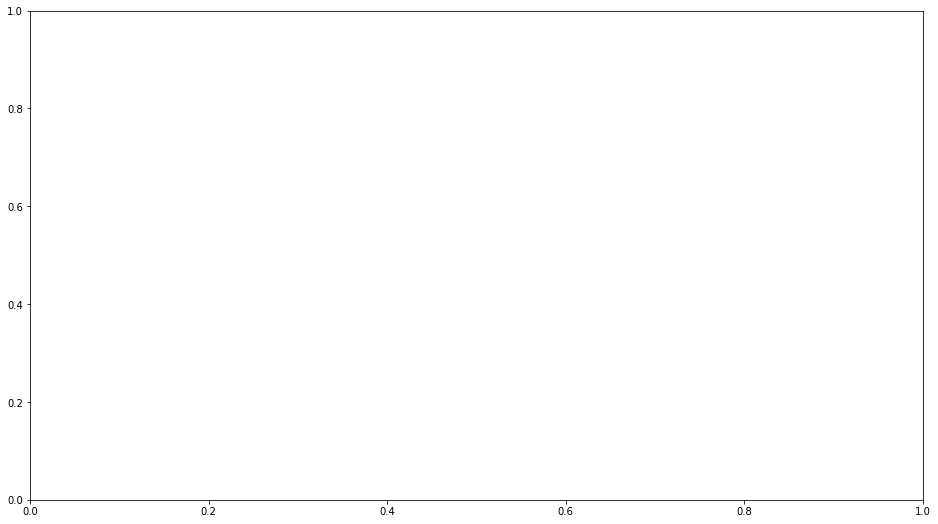

In [12]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(df,'r', alpha=0.3)
plt.plot(df2,'g', alpha=0.3)
plt.grid()
plt

plt.show()


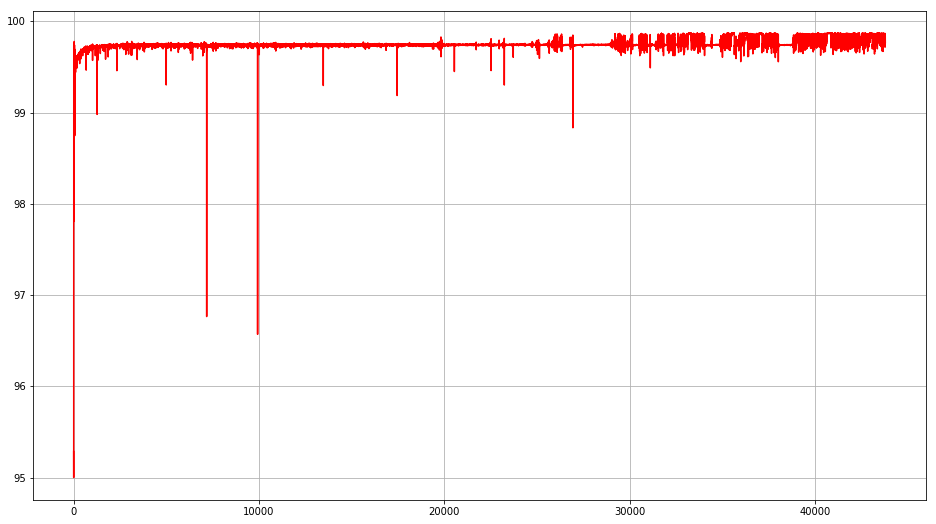

In [13]:
df = pd.DataFrame(dloss)
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(df,'r')
plt.grid()
plt
plt.show()



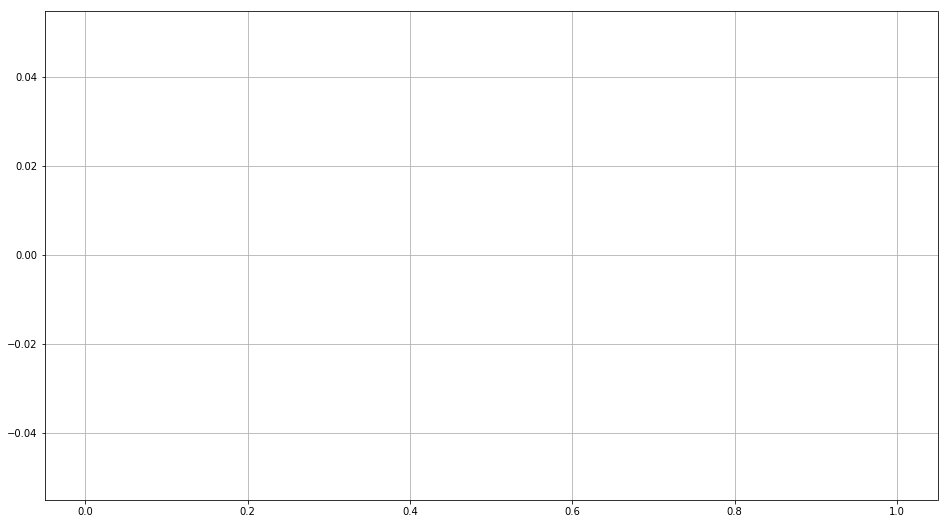

In [179]:
plt.hist(df)
plt.grid()

plt.show()

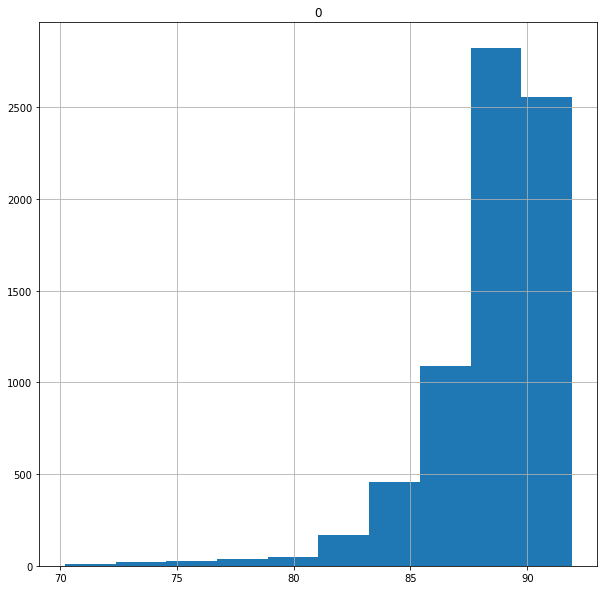

In [126]:
df.hist(figsize=(10,10))
plt.show()